In [1]:
## in this repo we trying modelling the linear regression using the Bayesian approach

In [224]:
# In this notebook i will use the diabetes dataset from sklearn to model
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
# we will compare the Bayesian method with the Gaussian Process method

import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import pandas as pd

In [226]:
# load the diabetes data from sklearn

from sklearn.datasets import load_diabetes

data = load_diabetes()

In [228]:
# feature
X = pd.DataFrame(data.data, columns=data.feature_names)
# data
y = pd.Series(data.target, name='disease_progression')

In [230]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [232]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: disease_progression, Length: 442, dtype: float64

## Modeling using the synthetic data

In [235]:
## for proofing the concept of the bayesian regresison we can generate a linear data
x = np.ones([200,2])

x[:,0] = np.linspace(-1,1,200)


In [237]:
# set the variance for the model
sigma = 0.3 # noise
mu = 0 # noise mean

# set the linear model weight
w = np.array([[-1.3, 0.5]])


In [239]:
# calculate the y value
y = x @ w.T + np.random.normal(mu, sigma, x[:,0:1].shape)

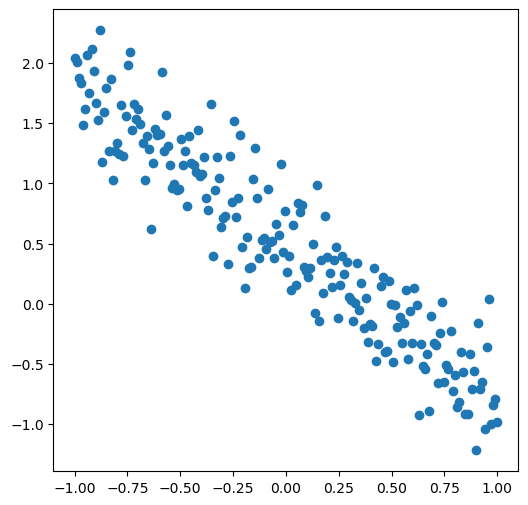

In [241]:
## plot the data
plt.figure(figsize=(6,6))
plt.scatter(x[:, 0], y)

In [243]:
## we starting modeling the bayesian regresison model with the prior of the weight the tau
# set the prior of weight as the multivairate gaussian random variable
tau = 0.5
prior_variance = tau * np.eye(w.shape[1])
prior_weight = multivariate_normal(mean=[0,0],cov=prior_variance)

In [245]:
prior_variance

array([[0.5, 0. ],
       [0. , 0.5]])

In [247]:
# function for plot distribution over the weight space
def plot_over_w(dist, title):
    w0, w1 = np.mgrid[-3:1:0.01, -1:3:0.01] #generate the distribution of the weight
    pos = np.empty([w0.shape[0], w0.shape[0], 2])
    pos[:,:, 0] = w0
    pos[:,:, 1] = w1
    plt.contour(w0, w1, dist.pdf(pos))
    plt.xlabel("w_0", fontsize=15)
    plt.ylabel("w_1", fontsize=15)
    plt.title(title, fontsize=15)

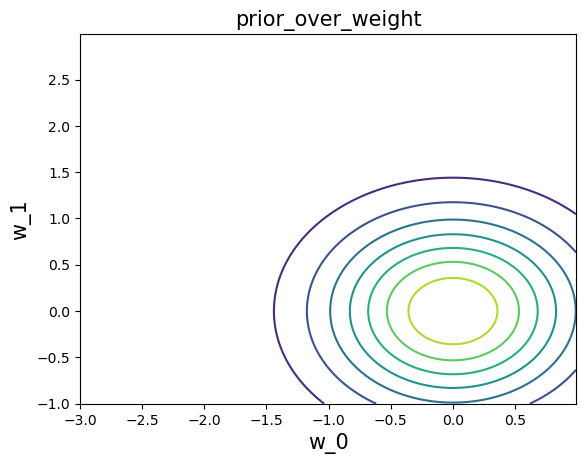

In [249]:
plot_over_w(prior_weight, "prior_over_weight")

In [251]:
#function that sample "posible line" from the distribution and plot them with the input/output data

# firstly we sample the line

def sample_lines(x, y, m, s):
    w = np.random.multivariate_normal(m.flatten(), cov = s)
    return x @ w[:, np.newaxis]

def plot_lines(x, y, m, s, N):
    lines = np.array([sample_lines(x, y, m, s) for _ in range(N)]) #sample N lines from the posterior
    
    # plot the line
    plt.plot(x[:, 0], lines[:,:, 0].T, 'r')
    
    #plot true data
    plt.plot(x[:, 0], y, marker='o', linestyle='none', color='green')

    plt.xlabel("x", fontsize=16)
    plt.ylabel("y", fontsize=16)

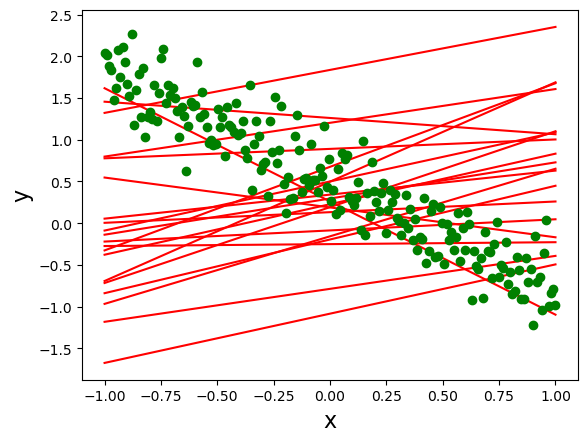

In [253]:
plot_lines(x, y, np.array([0,0]), prior_variance, 20)

In [255]:
# calculate the posterior distribution P(W|X,Y) based on the prior we have calculated previously,
def posterior(x, y, tau, sigma):
    tI = tau * np.identity(x.shape[1])
    m_n = np.linalg.inv((x.T @ x)/sigma + tI) @ x.T @ y / sigma
    s_n_inv = (x.T @ x)/sigma + tI
    s_n = np.linalg.inv(s_n_inv)
    return m_n, s_n


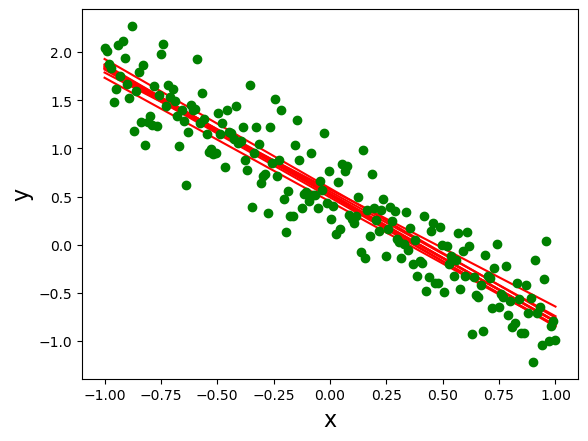

In [257]:
# visualize the posterior over W and sample some function with this posterior

## calculate the posteriror
m, s = posterior(x, y, tau, sigma)
posterior_w = multivariate_normal(mean=m.flatten(), cov = s)

# sample function from the posterior
plot_lines(x, y, m, s, N = 10)

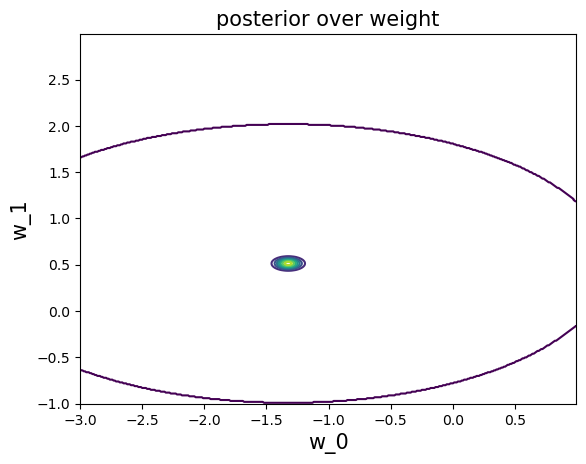

In [259]:
# plot the posterior over f
plot_over_w(posterior_w, "posterior over weight")

In [261]:
print("\n-----Mean and covariance of posterior for all data points-----")
print("mean: [%.2f, %.2f]" % (m[0], m[1]))
print("covariance: ")
print(s)


-----Mean and covariance of posterior for all data points-----
mean: [-1.32, 0.51]
covariance: 
[[0.00444532 0.        ]
 [0.         0.00149888]]


C:\Users\longv\AppData\Local\Temp\ipykernel_10460\3618639270.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("mean: [%.2f, %.2f]" % (m[0], m[1]))



-----Mean and covariance of posterior for 10 data points-----
mean: [-0.92, 0.97]
covariance: 
[[1.02747717 0.97000481]
 [0.97000481 0.94853408]]

-----Mean and covariance of posterior for 50 data points-----
mean: [-1.35, 0.49]
covariance: 
[[0.24470306 0.18511254]
 [0.18511254 0.14613737]]

-----Mean and covariance of posterior for 200 data points-----
mean: [-1.32, 0.51]
covariance: 
[[4.51252256e-03 2.26589132e-05]
 [2.26589132e-05 1.50651599e-03]]


C:\Users\longv\AppData\Local\Temp\ipykernel_10460\1552190932.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("mean: [%.2f, %.2f]" % (m[0], m[1]))


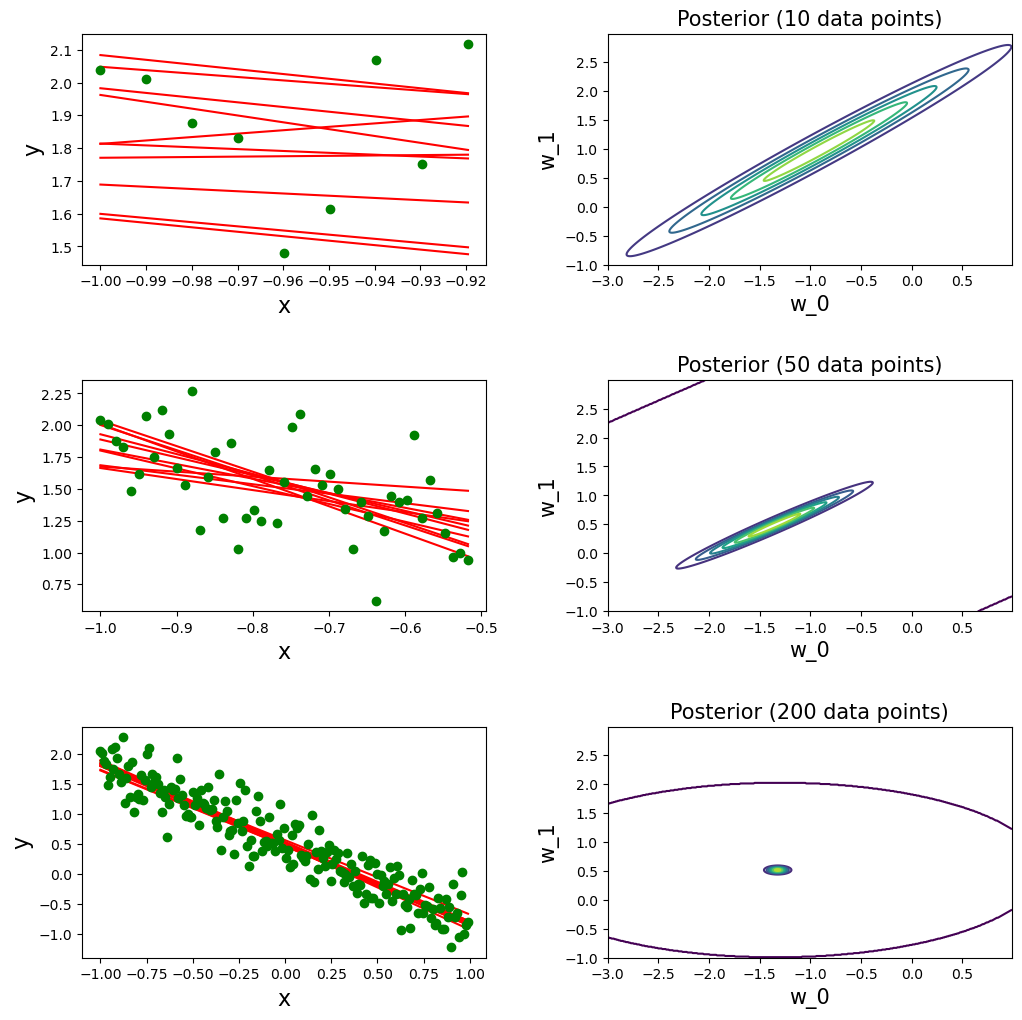

In [265]:
fig = plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

import pprint
pp = pprint.PrettyPrinter(indent=4)

num_data_points = [10, 50, 200]
for index, i in enumerate(num_data_points):
    # calculate posterior for i data points
    m, s = posterior(x[:i-1], y[:i-1], tau, sigma)
    posterior_w = multivariate_normal(mean=m.flatten(), cov=s)
    
    print("\n-----Mean and covariance of posterior for %i data points-----" % i)
    print("mean: [%.2f, %.2f]" % (m[0], m[1]))
    print("covariance: ")
    print(s)
    
    # sample from posterior and plot "possible" lines
    plt.subplot(len(num_data_points), 2, 2*index+1)
    plot_lines(x[:i-1, :], y[:i-1], m, s, N=10) 
    
    # plot posterior over w
    plt.subplot(len(num_data_points), 2, 2*index+2)
    plot_over_w(posterior_w, 'Posterior (%d data points)' % i)

In [267]:
## optimize the model. For optimizing the model we can use the MLE type 2. 
# The hyperparameters we interest is the noise vairance for the weight and vairance of the function

def log_marginal_likelihood(x, y, sigma, tau):

    N = x.shape[0]

    # compute the K = sigma^2*I + tau^2 * X * X^T
    K = sigma * np.eye(N) + tau * x @ x.T

    #cholesky decomposition
    L = np.linalg.cholesky(K)

    #solving the K^-1.y using cholesky
    # first solve the L.V = y -> then solve the L.T * alpha = v
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, y))

    #log det of K
    log_det_K = 2 * np.sum(np.log(np.diag(L)))

    lml = -0.5 * y.T @ alpha - 0.5 * log_det_K - 0.5 * N * np.log(2 * np.pi)

    return lml
    

In [269]:
# instead of maximizing the log-maginal likelihood It is equivilent to minimizing neg log likelihood
# and we try to reparameterize the tau and sigma

def neg_log_marginal_likelihood(log_hypers_params, x, y):
    log_tau_2, log_sigma_2 = log_hypers_params
    tau_2 = np.exp(log_tau_2)
    sigma_2 = np.exp(log_sigma_2)
    return -log_marginal_likelihood(x, y, sigma_2, tau_2)
    

In [271]:
# optimize
from scipy.optimize import minimize

# set the tau = 0.5 and sigma = 0.5 as the initial experiment
init_params = np.log([0.5, 0.5]) 

# minimize the nlml
res = minimize(neg_log_marginal_likelihood, init_params, args=(x,y), method='L-BFGS-B')

#extract the optimized parameters
log_tau_opt, log_sigma_opt = res.x
tau_2_opt = np.exp(log_tau_opt)
sigma_2_opt = np.exp(log_sigma_opt)

print(f"Optimal tau^2: {tau_2_opt}")
print(f"Optimal sigma^2: {sigma_2_opt}")


Optimal tau^2: 1.0124895052437335
Optimal sigma^2: 0.08300592416050734


In [273]:
res

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 42.159487459999156
        x: [ 1.241e-02 -2.489e+00]
      nit: 10
      jac: [-2.842e-05 -5.684e-06]
     nfev: 42
     njev: 14
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [275]:
tau = tau_2_opt
sigma = sigma_2_opt

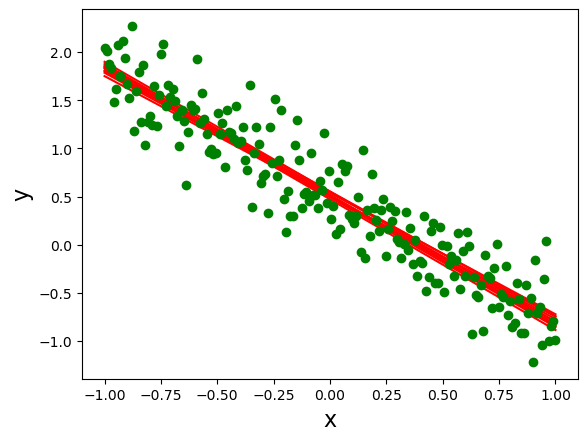

In [279]:
## calculate the posteriror
m, s = posterior(x, y, tau, sigma)
posterior_w = multivariate_normal(mean=m.flatten(), cov = s)

# sample function from the posterior
plot_lines(x, y, m, s, N = 10)

In [281]:
s

array([[0.00123116, 0.        ],
       [0.        , 0.00041486]])

In [285]:
m

array([[-1.3262172 ],
       [ 0.51419745]])

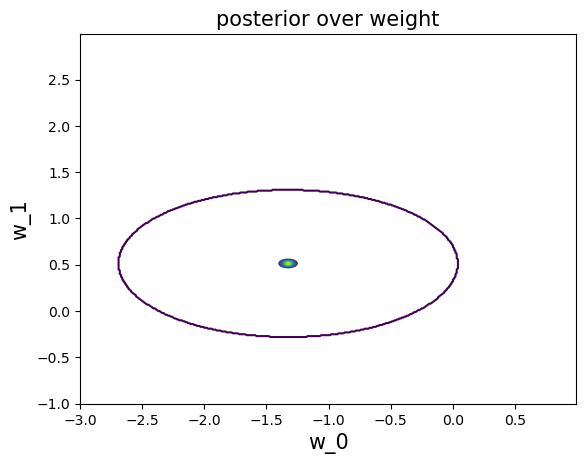

In [287]:
plot_over_w(posterior_w, "posterior over weight")

In [291]:
lml_before = log_marginal_likelihood(x, y, sigma=0.3, tau=0.5)
lml_after = log_marginal_likelihood(x, y, sigma=sigma_2_opt, tau=tau_2_opt)

print("LML Before:", lml_before)
print("LML After:", lml_after)

LML Before: [[-98.0645755]]
LML After: [[-42.15948746]]
